In [2]:
#@title Input{display-mode: "form"}
Name = 'MAI Signature' #@param {type:"string"}
Moderne_abstrakte_Kunst = 3 #@param {type:"slider", min:0, max:20, step:1}
Zahl_der_Beispiele= 6 #@param {type:"slider", min:0, max:8, step:1}

In [3]:
#@title Dateien klonen{display-mode: "form"}
! git clone https://github.com/hansomatig/handwriting-synthesis.git

Cloning into 'handwriting-synthesis'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (196/196), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 196 (delta 77), reused 134 (delta 52), pack-reused 0
Receiving objects: 100% (196/196), 43.66 MiB | 20.22 MiB/s, done.
Resolving deltas: 100% (77/77), done.


In [4]:
#@title Ordnerstruktur verändern{display-mode: "form"}
% cd handwriting-synthesis
! git checkout TFConV1toV2

/content/handwriting-synthesis
Branch 'TFConV1toV2' set up to track remote branch 'TFConV1toV2' from 'origin'.
Switched to a new branch 'TFConV1toV2'


In [5]:
#@title Zusätzliche Module installieren{display-mode: "form"}
! pip install svgwrite
! pip install cairosvg

     |████████████████████████████████| 66 kB 3.8 MB/s 
     |████████████████████████████████| 45 kB 3.0 MB/s 
     |████████████████████████████████| 70 kB 6.5 MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.2.0-py3-none-any.whl size=89562 sha256=f8339d3479cc9df47c6a26cc34871641f18808be063b83a59b03e0cb502064f4
  Stored in directory: /root/.cache/pip/wheels/e2/ca/86/9db2824f203afe4bdf5aa6ead017f352fcc90e92f095b78871
Successfully built cairocffi


In [6]:
#@title Autoreload{display-mode: "form"}
%load_ext autoreload
%autoreload 2
from demo import Hand

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
#@title Tensorflow einrichten {display-mode: "form"}
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [8]:
#@title Generator{display-mode: "form"}
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from IPython.display import display, Image
import cairosvg
from keras.models import load_model
import PIL
import numpy as np

model = load_model('keras_model.h5')




lines = [" "*Moderne_abstrakte_Kunst + Name]
biases = [2.5 for i in lines]
styles = [4 for i in lines]
hand = Hand()
predictions = {}

for i in range(10):
    hand.write(
        filename=f'img/img{i}.svg',
        lines=lines,
        styles=styles,
        biases=biases,
    )
    cairosvg.svg2png(url=f'img/img{i}.svg', write_to=f'img/png{i}.png')

    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = PIL.Image.open(f'img/png{i}.png')
    image = PIL.ImageOps.fit(image, (224, 224), PIL.Image.ANTIALIAS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array

    prediction = model.predict(data)
    predictions[i] = prediction[0][0]

predictions = sorted(predictions.items(), key=lambda x: x[1], reverse=True)

/usr/local/lib/python3.7/dist-packages/keras/layers/legacy_rnn/rnn_cell_impl.py:901: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/usr/local/lib/python3.7/dist-packages/keras/engine/base_layer_v1.py:1684: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


56.54639005661011%


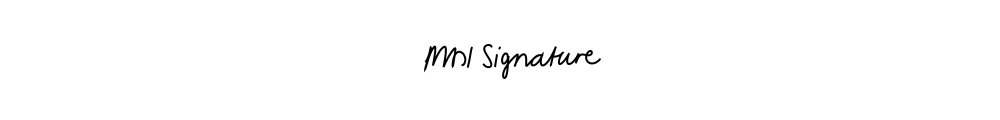

Button(description='Download', layout=Layout(border='solid', display='inline-box', height='30px', margin='0 0 …

Output()

51.053863763809204%


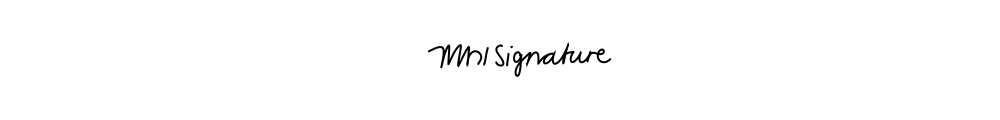

Button(description='Download', layout=Layout(border='solid', display='inline-box', height='30px', margin='0 0 …

Output()

50.820934772491455%


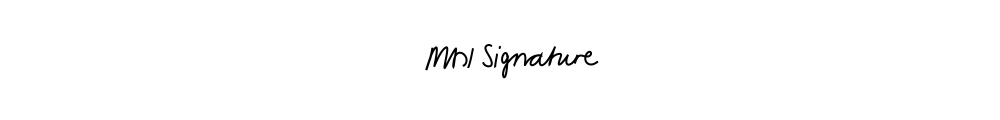

Button(description='Download', layout=Layout(border='solid', display='inline-box', height='30px', margin='0 0 …

Output()

43.54647099971771%


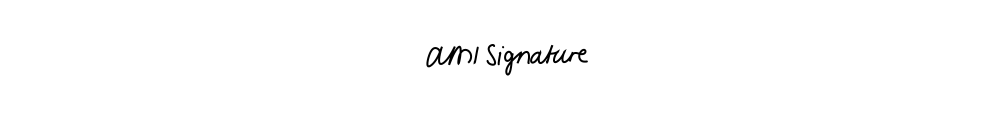

Button(description='Download', layout=Layout(border='solid', display='inline-box', height='30px', margin='0 0 …

Output()

37.60904371738434%


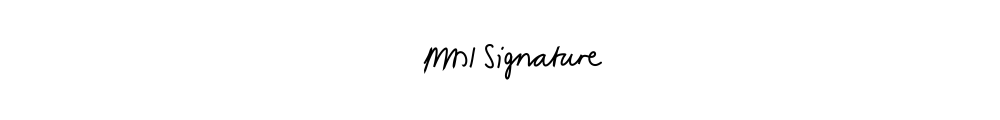

Button(description='Download', layout=Layout(border='solid', display='inline-box', height='30px', margin='0 0 …

Output()

29.91916537284851%


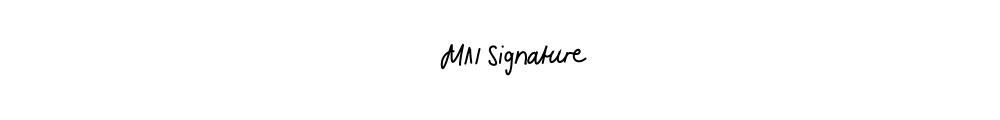

Button(description='Download', layout=Layout(border='solid', display='inline-box', height='30px', margin='0 0 …

Output()

In [12]:
#@title Bestergebnisse anzeigen{display-mode: "form"}
import ipywidgets as widgets
from IPython.display import display
import functools

def on_button_clicked(b, path=''):
    with output:
        from google.colab import files
        files.download(filename=f'img/png{path}.png')

button = widgets.Button(description="Click Me!")
output = widgets.Output()
for i in range(Zahl_der_Beispiele):
    print(str(predictions[i][1]*100) + '%')
    display(Image(filename=f'img/png{predictions[i][0]}.png'))
    button = widgets.Button(description="Download", layout=widgets.Layout(width='50%', height='30px', display="inline-box", border="solid", margin='0 0 50px 0'))
    output = widgets.Output()
    button.on_click(functools.partial(on_button_clicked, path=predictions[i][0]))
    display(button, output)